<a href="https://colab.research.google.com/github/Tashu1208/projects/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Importing the Data


In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/Credit Card Fraud detection/fraudTrain.csv")

In [ ]:
test_data = pd.read_csv("/content/drive/MyDrive/Credit Card Fraud detection/fraudTest.csv")

#Analysing the data and Cleaning it


In [ ]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
train_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
test_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
train_data.is_fraud.value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

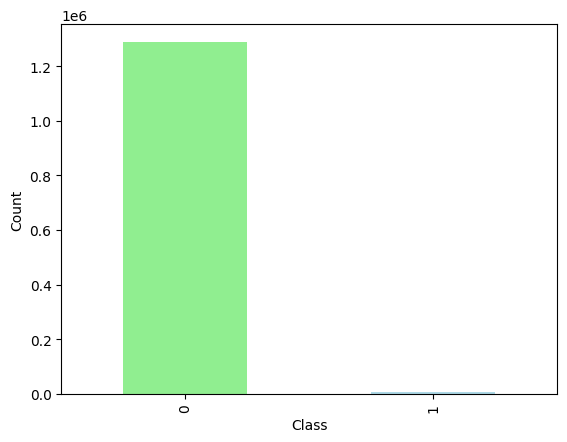

In [ ]:
train_data.is_fraud.value_counts().plot(kind ="bar", color=["lightgreen", "lightblue"], xlabel="Class", ylabel="Count");

In [ ]:
train_data.shape


(1296675, 23)

In [ ]:
test_data.is_fraud.value_counts()

0    553574
1      2145
Name: is_fraud, dtype: int64

#UnderSampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
x = train_data.drop(columns=["is_fraud"])
y = train_data["is_fraud"]
rus = RandomUnderSampler(sampling_strategy = 0.1 , random_state = 42)

In [ ]:
x,y = rus.fit_resample(x,y)

In [ ]:
#removing columns which is not required
column_name =['Unnamed: 0', 'merchant','state','first','job','dob','last','street','trans_num','unix_time','category','city']
train_data.drop(columns =column_name, inplace =True)
test_data.drop(columns =column_name, inplace =True)

In [ ]:
train_data.head()

,trans_date_trans_time,cc_num,amt,gender,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,4.97,F,28654,36.0788,-81.1781,3495,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,107.23,F,99160,48.8878,-118.2105,149,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,220.11,M,83252,42.1808,-112.2620,4154,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,45.00,M,59632,46.2306,-112.1138,1939,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,41.96,M,24433,38.4207,-79.4629,99,38.674999,-78.632459,0


In [ ]:
#parsing the trans_date_trans_time
#first converting it into the datetime format
train_data["trans_date_trans_time"] = pd.to_datetime(train_data["trans_date_trans_time"])
test_data["trans_date_trans_time"] = pd.to_datetime(test_data["trans_date_trans_time"])

In [ ]:
#converting it into time,day,month,hour columns in same dataframe
train_data['hour'] = train_data['trans_date_trans_time'].dt.hour
test_data['hour'] = test_data['trans_date_trans_time'].dt.hour

train_data['day'] = train_data['trans_date_trans_time'].dt.day
test_data['day'] = test_data['trans_date_trans_time'].dt.day

train_data['month'] = train_data['trans_date_trans_time'].dt.month
test_data['month'] = test_data['trans_date_trans_time'].dt.month

In [ ]:
#Now we have parsed it so we can drop trans_date_trans_time
train_data.drop("trans_date_trans_time",axis=1,inplace=True)
test_data.drop("trans_date_trans_time",axis=1,inplace=True)

In [ ]:
#By putting F as 0 and M as 1
train_data['gender'] = train_data['gender'].map({'F':0,'M':1})
test_data['gender'] = test_data['gender'].map({'F':0,'M':1})

In [ ]:
train_data.head()

,cc_num,amt,gender,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,hour,day,month
0,2703186189652095,4.97,0,28654,36.0788,-81.1781,3495,36.011293,-82.048315,0,0,1,1
1,630423337322,107.23,0,99160,48.8878,-118.2105,149,49.159047,-118.186462,0,0,1,1
2,38859492057661,220.11,1,83252,42.1808,-112.2620,4154,43.150704,-112.154481,0,0,1,1
3,3534093764340240,45.00,1,59632,46.2306,-112.1138,1939,47.034331,-112.561071,0,0,1,1
4,375534208663984,41.96,1,24433,38.4207,-79.4629,99,38.674999,-78.632459,0,0,1,1


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 13 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   cc_num      1296675 non-null  int64  
 1   amt         1296675 non-null  float64
 2   gender      1296675 non-null  int64  
 3   zip         1296675 non-null  int64  
 4   lat         1296675 non-null  float64
 5   long        1296675 non-null  float64
 6   city_pop    1296675 non-null  int64  
 7   merch_lat   1296675 non-null  float64
 8   merch_long  1296675 non-null  float64
 9   is_fraud    1296675 non-null  int64  
 10  hour        1296675 non-null  int64  
 11  day         1296675 non-null  int64  
 12  month       1296675 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 128.6 MB


In [ ]:
train_data.shape

(1296675, 13)

#Modelling the dataset

In [ ]:
x_train = train_data.drop('is_fraud',axis =1)
y_train = train_data['is_fraud']

x_test = test_data.drop('is_fraud',axis =1)
y_test = test_data['is_fraud']



In [ ]:
#scaling
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

#1. Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score,recall_score, classification_report

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9949128966258127

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score,recall_score, classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.35      0.36      0.36      2145

    accuracy                           0.99    555719
   macro avg       0.67      0.68      0.68    555719
weighted avg       1.00      0.99      0.99    555719



#HyperParameterTuning with RandomizedSearchCV

In [ ]:
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score
def evaluate_preds(y_true, y_preds):
  """
  Performs evaluation comparison on y_true labels vs y_preds labsles on a classification
  """
  accuracy =  accuracy_score(y_true,y_preds)
  precision= precision_score(y_true, y_preds)
  recall= recall_score(y_true, y_preds)
  f1 = f1_score(y_true, y_preds)
  metric_dict={"accuracy" : round(accuracy,2),
               "precision": round(precision,2),
               "recall": round(recall,2),
               "f1": round(f1,2)
               }
  print(f"Acc: {accuracy*100:.2f}%")
  print(f"Precision: {precision:.2f}")
  print(f"recall : {recall:.2f}")
  print(f"f1: {f1:.2f}")

  return metric_dict



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# Parameter grid for Decision Tree Classifier
tree_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20, 30, 50, 70, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

np.random.seed(42)

x_train = train_data.drop("is_fraud", axis=1)
y_train = train_data["is_fraud"]

x_test = test_data.drop("is_fraud",axis=1)
y_test = test_data['is_fraud']


model = DecisionTreeClassifier()

rs_model = RandomizedSearchCV(estimator=model,
                             param_distributions=tree_grid,
                             n_iter=10,
                             cv=5,
                             verbose=2)

rs_model.fit(x_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=entropy, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=best; total time=   3.4s
[CV] END criterion=entropy, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=best; total time=   4.2s
[CV] END criterion=entropy, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=best; total time=   5.6s
[CV] END criterion=entropy, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=best; total time=   4.9s
[CV] END criterion=entropy, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=best; total time=   3.8s
[CV] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=5, splitter=best; total time=  12.4s
[CV] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=5, splitter=best; t

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   1.5s
[CV] END criterion=entropy, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   5.6s
[CV] END criterion=entropy, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   4.6s
[CV] END criterion=entropy, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   4.2s
[CV] END criterion=entropy, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   5.5s
[CV] END criterion=entropy, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   5.2s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=random; total time=   0.4s
[CV] END criterion=gini, max_depth=5, max_featur

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best; total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best; total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best; total time=   3.7s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best; total time=   4.9s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best; total time=   5.8s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   4.9s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   6.1s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   4.9s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   4.9s
[CV] END criterion=gini, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   5.5s


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 5, 10, 15, 20, 30,
                                                      50, 70, 100],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']},
                   verbose=2)

In [ ]:
rs_model.best_params_

{'splitter': 'best',
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': None,
 'max_depth': 10,
 'criterion': 'entropy'}

In [ ]:
rs_y_pred = rs_model.predict(x_test)
rs_metrics = evaluate_preds(y_test,rs_y_pred)

Acc: 99.71%
Precision: 0.67
recall : 0.47
f1: 0.55


In [ ]:
model = DecisionTreeClassifier(splitter = 'best',
                          min_samples_split = 5,
                          min_samples_leaf = 4,
                          max_features = None,
                          max_depth = 10,
                          criterion = 'entropy')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.67      0.47      0.55      2145

    accuracy                           1.00    555719
   macro avg       0.84      0.73      0.77    555719
weighted avg       1.00      1.00      1.00    555719

